<a href="https://colab.research.google.com/github/TonySC1300/Simulacion1/blob/main/M%C3%A9todo_de_la_Trasformada_Inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elaborar un código en Python que implemente el método de la transformada inversa para generar la distribución triangular de parámetros a=1, b=3, c=5

*   Analíticamente
*   Mediante simulación

Es necesario que el programa de explícitamente el resultado: histograma, media y desviación estándar y lo compare contra los resultados teóricos.


Calculando los valores analiticamente de la funcion:
$$ f(x) =
\begin{cases}
  \frac{2\cdot(x - a)}{(c - a)\cdot(b - a)} & \text{si } a \leq x \leq b \\
  \frac{2\cdot(c - x)}{(c - a)\cdot(c - b)} & \text{si } b < x \leq c
\end{cases}
$$

In [55]:
# Importando las librerias necesarias para hacer el
# calculo de la integral sin conocer los valores de las constantes, a, b, c
from sympy import symbols
from sympy import Piecewise
from sympy import integrate
from sympy import simplify
from sympy import pprint

In [56]:
# Variables simbólicas
x, a, b, c = symbols('x a b c', real=True)

In [57]:
# Definir función por tramos
f1 = 2 * (x - a) / ((c - a) * (b - a))  # a ≤ x ≤ b
f2 = 2 * (c - x) / ((c - a) * (c - b))  # b < x ≤ c

In [58]:
# Calcular la media
media_alg = integrate(x * f1, (x, a, b)) + integrate(x * f2, (x, b, c))

In [59]:
# Calcular E[X²]
ex2 = integrate(x**2 * f1, (x, a, b)) + integrate(x**2 * f2, (x, b, c))

In [60]:
# Varianza
varianza_alg = simplify(ex2 - media_alg**2)

In [61]:
# Desviacion estandar
desviacion_alg = simplify(varianza_alg**0.5)

In [62]:
# Mostrar resultados
print("Media:")
print(simplify(media_alg))

print("\nVarianza:")
print(varianza_alg)

print("\nDesviación estándar:")
print(desviacion_alg)

Media:
a/3 + b/3 + c/3

Varianza:
a**2/18 - a*b/18 - a*c/18 + b**2/18 - b*c/18 + c**2/18

Desviación estándar:
0.235702260395516*(a**2 - a*b - a*c + b**2 - b*c + c**2)**0.5


Ahora calculando la media y varianza de la funcion de forma analitica con los valores
$$a=1, b=3, c=5$$

In [63]:
# Definir variables y constantes
x = symbols('x', real=True)
a = 1
b = 3
c = 5

In [64]:
# Definir las dos partes de la función triangular
f1 = 2 * (x - a) / ((c - a) * (b - a))  # para x en [a, b]
f2 = 2 * (c - x) / ((c - a) * (c - b))  # para x en [b, c]

In [65]:
# Calcular la media
media = integrate(x * f1, (x, a, b)) + integrate(x * f2, (x, b, c))

# Calcular E[X²]
ex2 = integrate(x**2 * f1, (x, a, b)) + integrate(x**2 * f2, (x, b, c))

# Varianza: E[X^2] - (E[X])^2
varianza = simplify(ex2 - media**2)

# Desviacion estandar
desviacion = simplify(varianza**0.5)

print("La media calculada analitica es: ", media)
print("La varianza calculada analiticamente es: ", varianza)
print("La desviacion estandar calculada analiticamente es: ", desviacion)

La media calculada analitica es:  3
La varianza calculada analiticamente es:  2/3
La desviacion estandar calculada analiticamente es:  0.816496580927726


Calculando la transformada inversa sin conocer los valores de las constantes

In [66]:
# Importando las librerias necesarias para hacer el
# calculo de la transformada inversa sin conocer los valores
# de las constantes, a, b, c
from sympy import symbols
from sympy import integrate
from sympy import solve
from sympy import Eq
from sympy import simplify

In [67]:
# Calculando la transformada inversa de cada una
# de las partes de la funcion a trozos
# Definir variables simbólicas
x, u, a, b, c = symbols('x u a b c', real=True)

# f(x) en [a, b]
f1 = 2 * (x - a) / ((c - a) * (b - a))
F1 = simplify(integrate(f1, (x, a, x)))  # CDF en [a, b]

# f(x) en (b, c]
f2 = 2 * (c - x) / ((c - a) * (c - b))
F2 = simplify(integrate(f1, (x, a, b)) + integrate(f2, (x, b, x)))  # CDF en [b, c]

In [68]:
# Resolviendo y despejando
# Inversa de la CDF (resolver F(x) = u)
x1_inv = solve(Eq(F1, u), x)[0]  # Inversa en [a, b]
x2_inv = solve(Eq(F2, u), x)[0]  # Inversa en (b, c]

print("La inversa de la CDF en [a, b] es: ", x1_inv)
print("La inversa de la CDF en (b, c] es: ", x2_inv)

La inversa de la CDF en [a, b] es:  a - sqrt(u*(a - b)*(a - c))
La inversa de la CDF en (b, c] es:  c - sqrt(-(a - c)*(b - c)*(u - 1))


Ahora calculando la transformada inversa de la funcion de forma analitica con los valores
$$a=1, b=3, c=5$$

In [69]:
from sympy import symbols
from sympy import sqrt
from sympy import simplify

In [70]:
# Variables
u = symbols('u', real=True)
a_val = 1
b_val = 3
c_val = 5

In [71]:
# Inversas con valores específicos
x1_inv_val = a_val - sqrt(u * (a_val - b_val) * (a_val - c_val))
x2_inv_val = c_val - sqrt(-(a_val - c_val) * (b_val - c_val) * (u - 1))

In [72]:
# Simplificar expresiones
x1_inv_val = simplify(x1_inv_val)
x2_inv_val = simplify(x2_inv_val)

print("La inversa de la CDF en [a, b] es: ", x1_inv_val)
print("La inversa de la CDF en (b, c] es: ", x2_inv_val)

La inversa de la CDF en [a, b] es:  -2*sqrt(2)*sqrt(u) + 1
La inversa de la CDF en (b, c] es:  5 - 2*sqrt(2 - 2*u)


Calculando los valores de la media y la varianza mediante simulacion por el *Método de la Trasformada Inversa*

In [73]:
# Importando las librerias necesarias
# para hacer la simulacion y graficar el histograma
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
# Definiendo la funcion para calcular el valor aleatorio de x
def tri(n):
  # Declarando la lista donde se guardaran los valores de x
    lista = []
    for _ in range(n):
      # Se genera un numero aleatorio y se calcula el valor de
      # x dependiendo de en que intervalo caiga el numero generado,
      # sera la funcion de transformada inversa que se deba de utilizar
        R = rd.random()
        if R < 0.5:
            x = 1 + 2 * np.sqrt(2 * R)
        else:
            x = 5 - 2 * np.sqrt(2 * (1 - R))
        lista.append(x)
    return lista

In [75]:
k= 100000
var = tri(k) #Se generan 100,000 npumeros aleatorios con distribución triangular

In [76]:
# Definir la función de densidad teórica para graficarla
# y compararla contra el histograma
def f(x):
    if 1 <= x <= 3:
        return 2 * (x - 1) / ((5 - 1) * (3 - 1))
    elif 3 < x <= 5:
        return 2 * (5 - x) / ((5 - 1) * (5 - 3))
    else:
        return 0

In [77]:
# Vectorizar la función f para aplicarla a arrays
f_vector = np.vectorize(f)

In [78]:
# Crear puntos x y evaluar f(x)
x_vals = np.linspace(1, 5, 500)
y_vals = f_vector(x_vals)

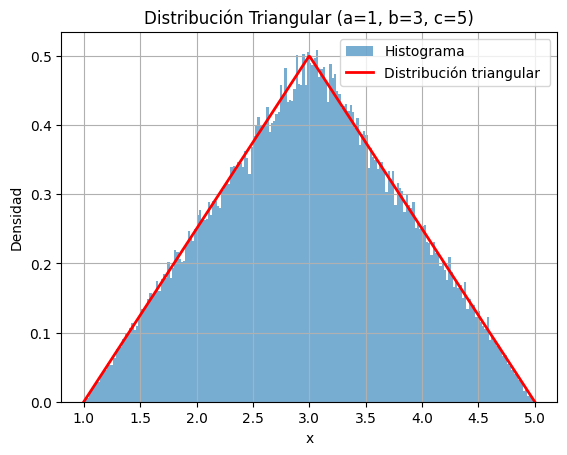

In [79]:
# Graficar histograma y función teórica
plt.hist(var, bins=200, density=True, alpha=0.6, label='Histograma')
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Distribución triangular ')
plt.title("Distribución Triangular (a=1, b=3, c=5)")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

In [80]:
# Con la lista almacenada en la variable d
# se calcula el valor aproximado de la media y la varianza
print("Media aproximada: ", np.mean(var))
print("Varianza aproximada: ", np.var(var))
print("Desviacion estandar aproximada: ", np.std(var))
# Se calcula la exactitud de los calculos hechos mediante
# la simulacion contra los calculos hechos analiticamente
E_abs_med = abs(np.mean(var)-media)
E_abs_var = abs(np.var(var)-varianza)
E_absa_des = abs(np.std(var)-desviacion)

Media aproximada:  2.9996440583474
Varianza aproximada:  0.6639319796192543
Desviacion estandar aproximada:  0.8148202130649769


In [82]:
print("El error absoluto de la media son: ", E_abs_med)
print("El porcentaje de aceptacion de la media es: ", abs(np.mean(var)/media)*100, "%")
print("\nEl error absoluto de la varianza son: ", E_abs_var)
print("El porcentaje de aceptacion de la varianza es: ", abs(np.var(var)/varianza)*100, "%")
print("\nEl error absoluto de la desviacion estandar son: ", E_absa_des)
print("El porcentaje de aceptacion de la desviacion estandar es: ", abs(np.std(var)/desviacion)*100, "%")

El error absoluto de la media son:  0.000355941652599778
El porcentaje de aceptacion de la media es:  99.9881352782467 %

El error absoluto de la varianza son:  0.00273468704741231
El porcentaje de aceptacion de la varianza es:  99.5897969428881 %

El error absoluto de la desviacion estandar son:  0.00167636786274916
El porcentaje de aceptacion de la desviacion estandar es:  99.7946877057532 %
